In [1]:
import vtk
from IPython.display import Image


In [2]:
def vtk_show(renderer, width=None, height=None):
    """
    Converts a vtkRenderer object into an iPython image
    
    Note: This method generates an external window within which 
    rendering actually occurs. The generated image is then returned 
    to the ipython session.
    
    Ref: https://pyscience.wordpress.com/2014/09/03/ipython-notebook-vtk/
    """
    if width == None:
        width = 400
    if height == None:
        height=300
    
    renderWindow = vtk.vtkRenderWindow() #Create new rendering window
    renderWindow.SetOffScreenRendering(1) #Enable off-screen rendering
    renderWindow.AddRenderer(renderer) #Create instance
    renderWindow.SetSize(width, height) #Set Dims
    renderWindow.Render() #Execute render operation
    
    windowToImageFilter = vtk.vtkWindowToImageFilter() #Create a new vtkWindow -> Image filter object which allows us to read teh data in a vtkWindow and use it as input to the imaging pipeline.
    windowToImageFilter.SetInput(renderWindow) #Add renderWindow to the filter object
    windowToImageFilter.Update() #Update object
    
    writer = vtk.vtkPNGWriter() #Create vtk PNG writer object thereby allowing creation of PNG images of the vtkWindow rendering
    writer.SetWriteToMemory(1) #Setting eq to 1 enables image to be held in memory instead of saving to disk. This is the desired option since the image is meant to be loaded back into the notebook instead of stored on disk
    writer.SetInputConnection(windowToImageFilter.GetOutputPort()) # Link between output (GetOutputPort) of vtkWindowToImageFilter and the PNG writer (SetInputConnection)
    writer.Write()
    data = str(buffer(writer.GetResult()))
    
    return Image(data)

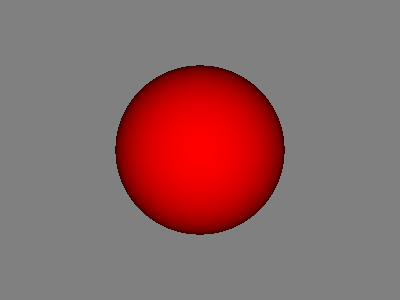

In [3]:
# Rendering Example: A Red Ball
VtkSourceSphere = vtk.vtkSphereSource() #Create a sphere represented by polygons
VtkSourceSphere.SetCenter(0.0, 0.0, 0.0) #Define sphere center location
VtkSourceSphere.SetRadius(10.0) #Define radius of sphere
VtkSourceSphere.SetPhiResolution(360) #Define # of points to include in the latitudinal direction
VtkSourceSphere.SetThetaResolution(360) #Define # of points to include in the longitudinal direction

VtkMapperSphere = vtk.vtkPolyDataMapper() #Maps polygonal data to graphics primatives
VtkMapperSphere.SetInputConnection(VtkSourceSphere.GetOutputPort()) #Connect output port of the sphere source to the input port of the mapper

VtkActorSphere = vtk.vtkActor() #The actor represents the object or entity in the rendering scene
VtkActorSphere.SetMapper(VtkMapperSphere) # The mapper is connected to the actor in order to connect the sphere object to the actor that will represent it in the rendered image
VtkActorSphere.GetProperty().SetColor(1.0, 0.0, 0.0) #SetColor follows the RGB catalogue and each value can range from 0.0 to 1.0. Here the sphere color is being set to RED.

VtkRenderer = vtk.vtkRenderer() #Create a new rendering object
VtkRenderer.SetBackground(0.5, 0.5, 0.5) #The background color is set to white (1.0, 1.0, 1.0). Conversely, black is (0.0, 0.0, 0.0), again following the RGB catalogue.
VtkRenderer.AddActor(VtkActorSphere) #Now the actor that is representing the sphere is connected to the renderer in order to generate the image.

vtk_show(VtkRenderer) #Execute and display the rendered result in the ipython notebook.